# **Olympic Medal Data Analysis**

## Importing Libraries

In [2]:
import rarfile
import requests
import pandas as pd
from io import BytesIO

# URL of the .rar file on GitHub
url = "https://github.com/TruptiJosh/Prediction-Model_Olympic-Medal/blob/main/athlete_events.rar?raw=true"

# Download the file from GitHub
response = requests.get(url)
if response.status_code == 200:
    print("File downloaded successfully.")
  
else:
    print("Failed to download the file.")

File downloaded successfully.


In [3]:
# Importing all the required packages
!pip install tensorflow
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Dataset

In [19]:
#Reading the data
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [20]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# seeing group summary of season column
data['Season'].value_counts()

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

In [8]:
# seeing group summary of Medal column
data['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [9]:
data['Year'].value_counts()

Year
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: count, dtype: int64

In [10]:
# seeing group summary of Event cloumn
data['Event'].value_counts()

Event
Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 765, dtype: int64

In [11]:
# seeing group summary of Team cloumn
data['Team'].value_counts()

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: count, Length: 1184, dtype: int64

## Exploratory Data Analysis

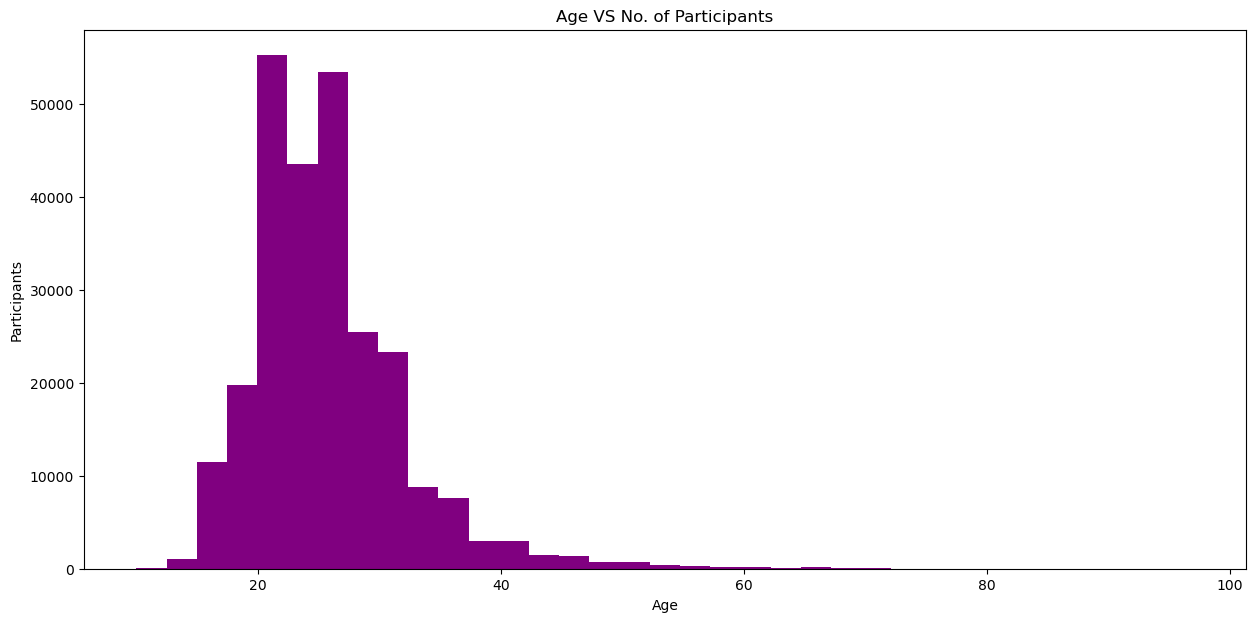

In [13]:
# Age Distribution

plt.figure(figsize=(15,7))
plt.title("Age VS No. of Participants")
plt.hist(data.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

In [21]:
# Age to participant distribution
age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
age_dist


Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
26.0    17675
27.0    16025
20.0    15258
28.0    14043
19.0    11643
29.0    11463
30.0     9488
18.0     8152
31.0     7559
32.0     6246
Name: count, dtype: int64

Most of the athletes are in between Age group 20 to 30


In [26]:
# Gender Distribution
gender_unique_values = data.Sex.value_counts()
gender_unique_values

Sex
M    196594
F     74522
Name: count, dtype: int64

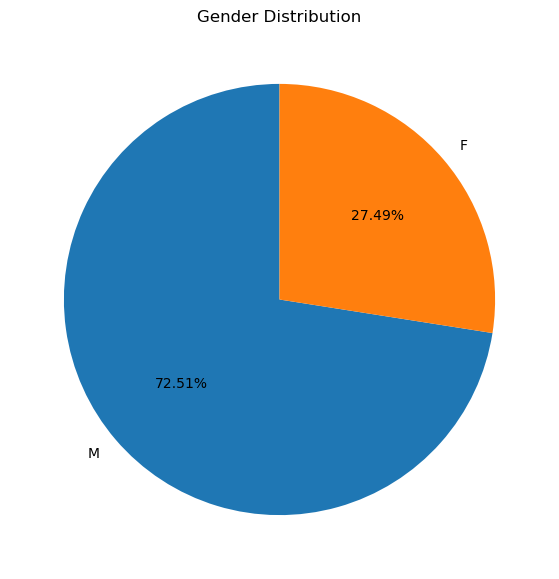

In [27]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

Here, We observe that male participants are more than female participants in the olympics

In [28]:
# seeing female participants in each year in summer season

female_part = data[(data.Sex=='F') & (data.Season == 'Summer')][['Sex', 'Year']]
female_part = female_part.groupby('Year').count().reset_index()
female_part

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


Text(0, 0.5, 'Female Participants')

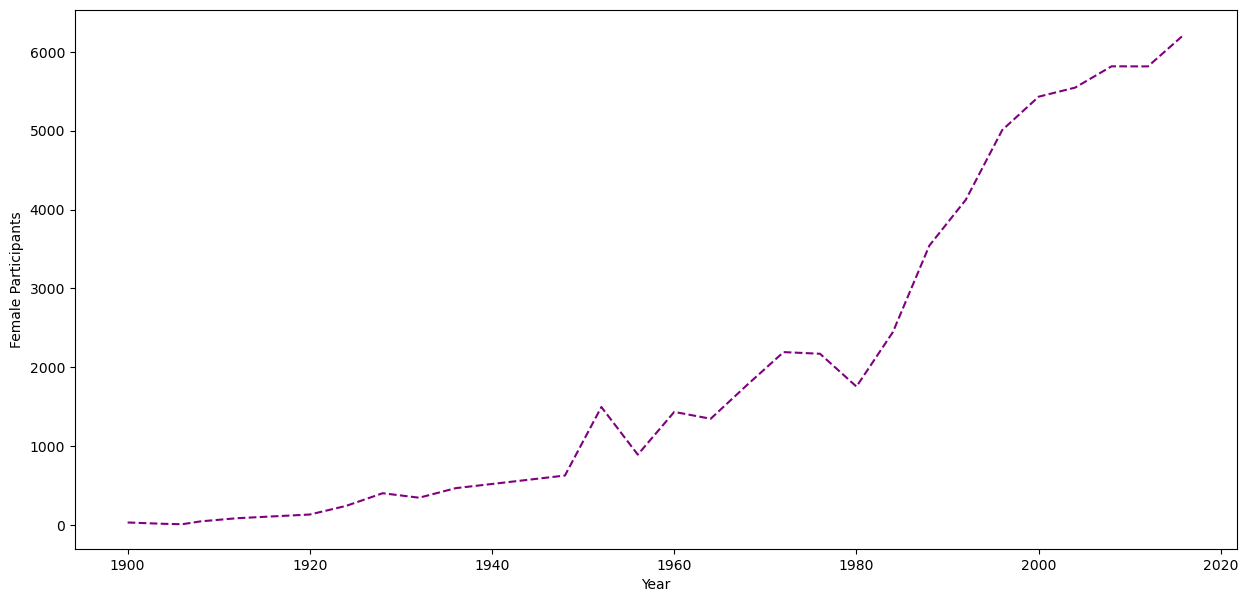

In [29]:
# Visualizing the female participant data

plt.figure(figsize=(15,7))
sns.lineplot(data=female_part, x='Year', y='Sex', linestyle = '--', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Female Participants')

We can see that Female Participants have increased by a great extent since 1960's

In [30]:
# Participants across the season

seasons = data.Season.value_counts()
seasons

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

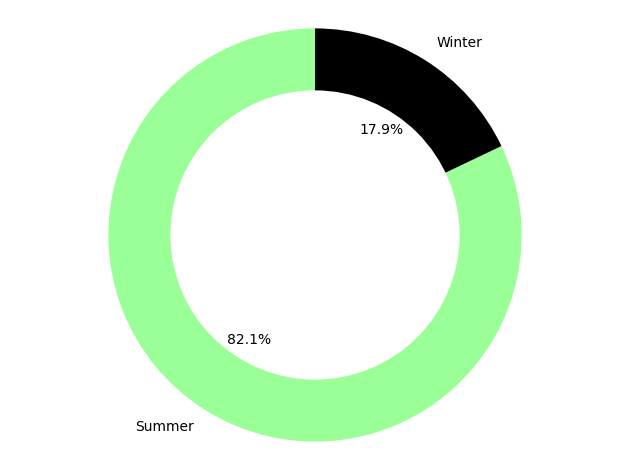

In [32]:
# Visualizing paritipant distribution in different season
fig1, ax1 = plt.subplots()

colors = ['#99ff96','#000000']

ax1.pie(seasons, colors = colors, labels=seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Participation in summer season is more than the winter season

In [33]:
# Top 15 Countries participating in Olympics by no. of participants
top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
top_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Poland            6143
Switzerland       5844
Netherlands       5718
Soviet Union      5535
Finland           5379
Name: count, dtype: int64

<Axes: title={'center': 'Top 15 Countries Total Participations'}, xlabel='Team', ylabel='count'>

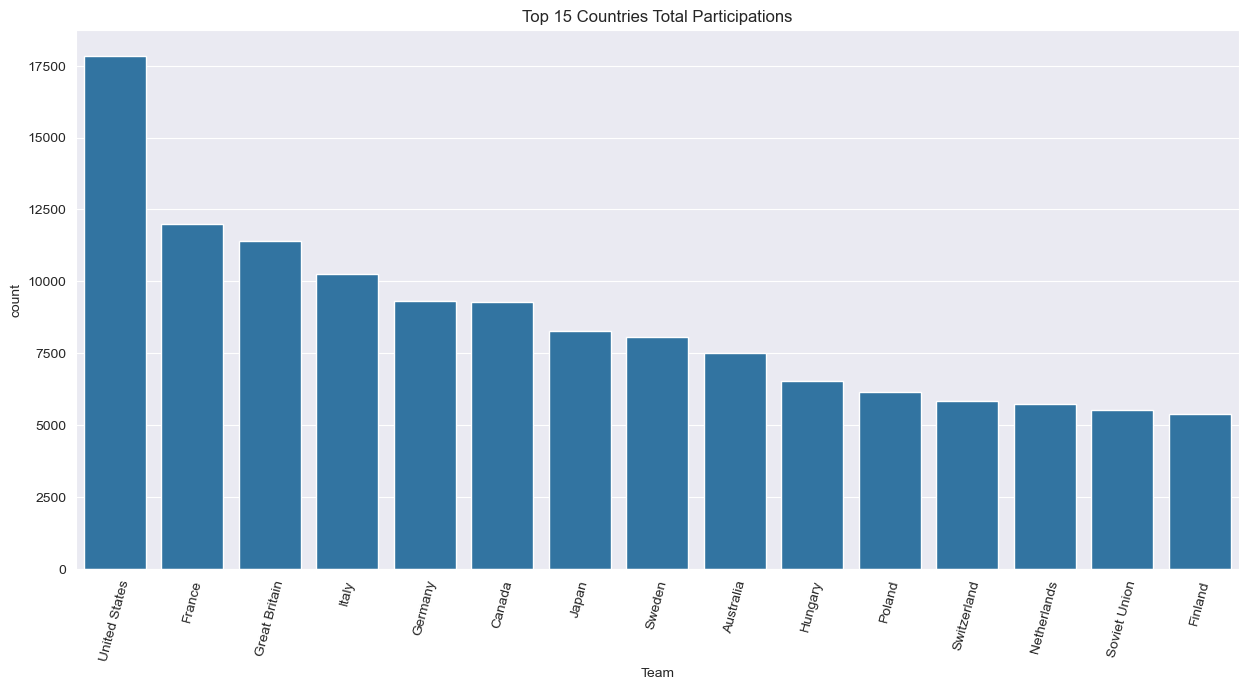

In [34]:
# Data Visualization of countries participating
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries)

In [36]:
# Data of countries with most Gold medals

max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country


Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Name: count, dtype: int64

Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

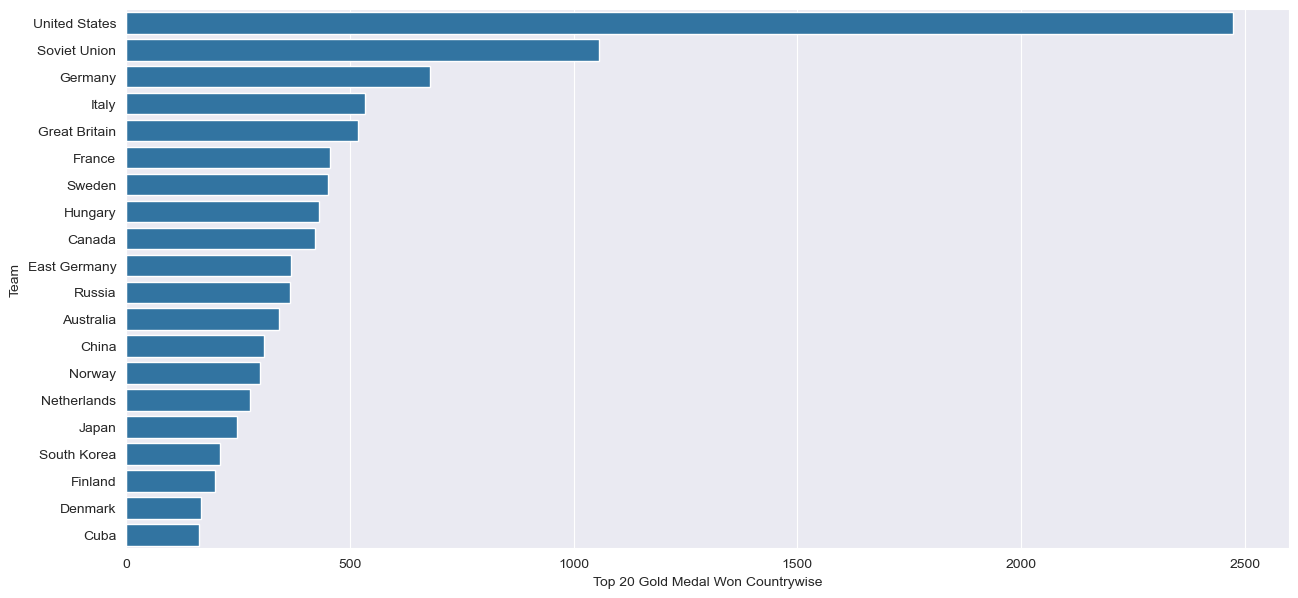

In [37]:
# Visulaizing the countries with most Gold medals
plt.figure(figsize=(15,7))
sns.barplot(x=max_year_country, y=max_year_country.index)
plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

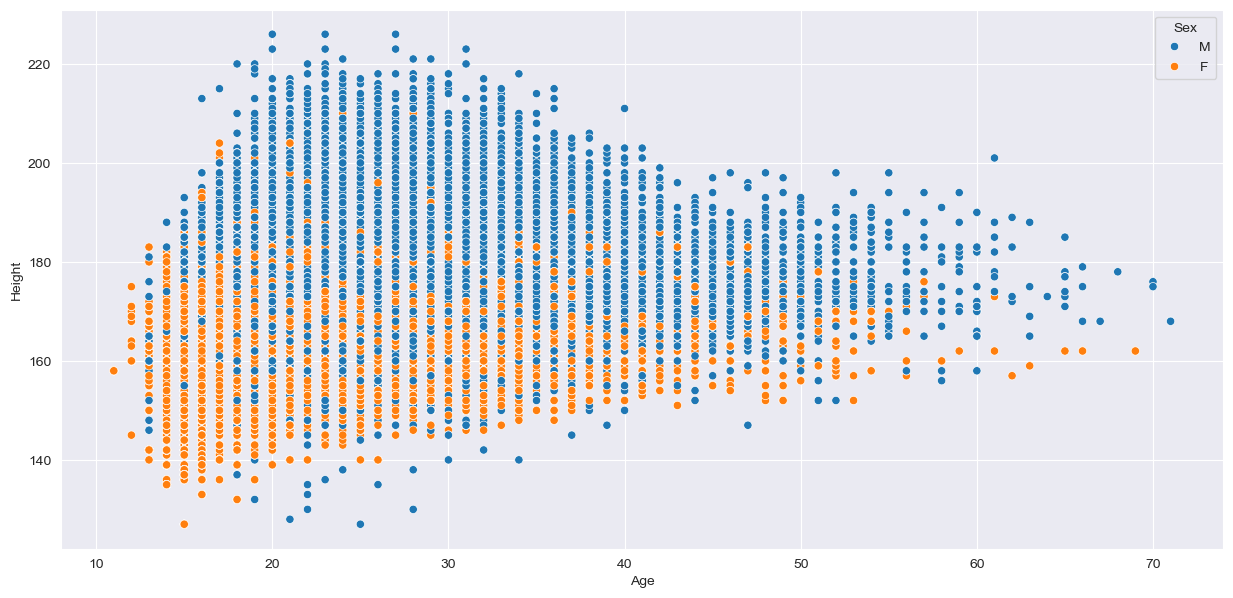

In [38]:
# Age vs Height Spread

age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')

Text(0, 0.5, 'Weight')

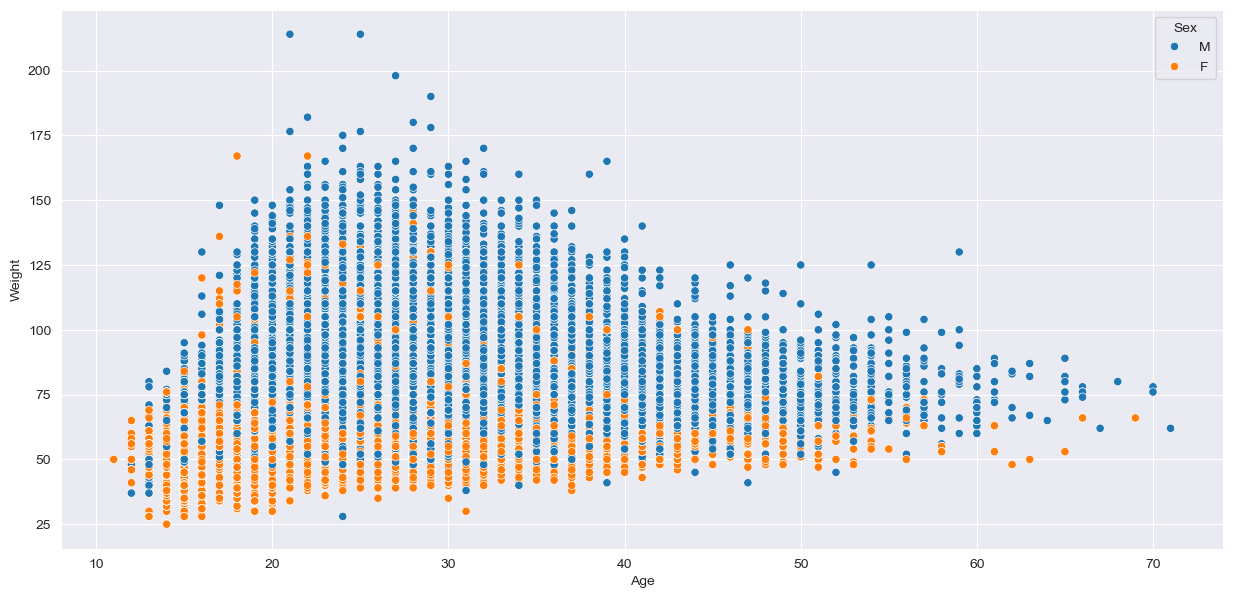

In [39]:
# Age vs Weight Spread

age_weig = data[(data.Age != 0.0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_weig.Age, y=age_weig.Weight, data=age_weig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Weight')

Text(0, 0.5, 'Height')

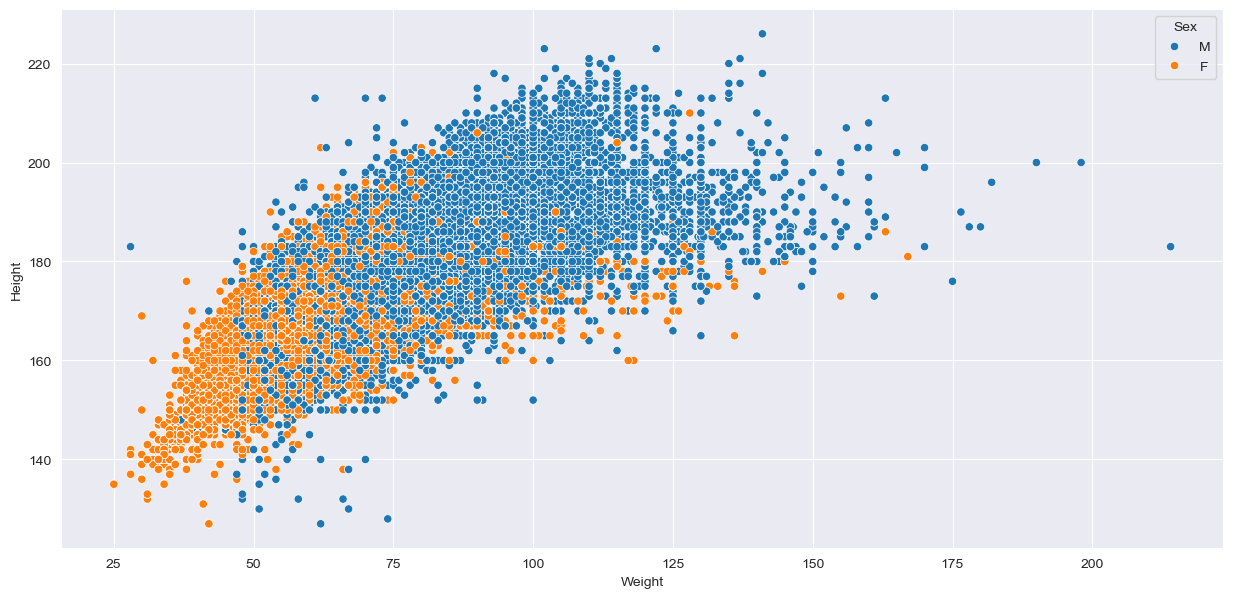

In [40]:
# Weight & Height Spread

heig_weight = data[(data.Height != 0.0) & (data.Age != 0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=heig_weight.Weight, y=heig_weight.Height, data=heig_weight, hue='Sex')
plt.xlabel('Weight')
plt.ylabel('Height')

## Data Cleaning

In [21]:
# To fill missing values in Medal column with 0's and 1's
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [22]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [23]:
# Drop Uncessary feature columns
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [24]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [25]:
# Checking null values in the data 
data.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [26]:
data.dtypes

Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal       int64
dtype: object

In [30]:
# Select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number'])

# Group by 'Medal' and 'Sex' and calculate the mean
grouped_mean = numeric_columns.groupby([data['Medal'], data['Sex']]).mean().astype(int)

print(grouped_mean)


           Age  Height  Weight  Year  Medal
Medal Sex                                  
0     F     23     167      59  1992      0
      M     26     178      75  1974      0
1     F     24     170      63  1992      1
      M     26     181      79  1966      1


In [31]:
data.isna().sum()

Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [37]:
# Fill null values with mean values for these columns
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())

In [38]:
data.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [39]:
# Checking null values again
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [40]:
# Checking no. of unique values in the column
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [41]:
# defining the function.
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [42]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [43]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24.0,180.00000,80.000000,1992,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23.0,170.00000,60.000000,2012,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,24.0,175.33897,70.702393,1920,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,34.0,175.33897,70.702393,1900,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,21.0,185.00000,82.000000,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,179.00000,89.000000,1976,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271112,1,27.0,176.00000,59.000000,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271113,1,27.0,176.00000,59.000000,2014,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271114,1,30.0,185.00000,96.000000,1998,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# Spilt data in target column and features columns
y = data['Medal']
X = data.drop('Medal', axis=1)

## Feature Selection

In [45]:
#Apply SelectKBest and extract top 10 features out of the data
best = SelectKBest(score_func=chi2, k=10)

In [46]:
fit = best.fit(X,y)

In [47]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [48]:
# Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                  Feature        Score
1404                N_URS  3912.466445
982        T_Soviet Union  3875.363234
3                  Weight  3638.510747
1406                N_USA  3490.799425
1101      T_United States  3025.609256
1505             S_Rowing  1457.130819
1266                N_GDR  1149.074852
307        T_East Germany  1012.719371
1506              S_Rugby   942.009049
1988  E_Rugby Men's Rugby   942.009049
1422          C_Antwerpen   855.917838


In [49]:
# Select 10 features
features=scores["Feature"].tolist()[:10]
features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_30. Februar',
 'T_A North American Team',
 'T_Acipactli',
 'T_Acturus']

## Make new dataset with cleaned data

In [50]:
data=data[['Age','Sex','Height','Weight','Year','Season','T_Afghanistan','T_Algeria','T_Angola','T_Argentina','Medal']]
data.head()

,Age,Sex,Height,Weight,Year,Season,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,Medal
0,24.0,1,180.00000,80.000000,1992,1,False,False,False,False,0
1,23.0,1,170.00000,60.000000,2012,1,False,False,False,False,0
2,24.0,1,175.33897,70.702393,1920,1,False,False,False,False,0
3,34.0,1,175.33897,70.702393,1900,1,False,False,False,False,1
4,21.0,0,185.00000,82.000000,1988,0,False,False,False,False,0


In [51]:
y = data['Medal']
X = data.drop(['Medal'], axis=1)

#Split data into training and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


## Feature Scaling

In [52]:
# Scaling data 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Predictive Modeling

In [53]:
# 1. Logistic Regression

algo1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[92575     2]
 [15867     3]]


Accuracy of Logistic Regression: 85.36704565363726 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.60      0.00      0.00     15870

    accuracy                           0.85    108447
   macro avg       0.73      0.50      0.46    108447
weighted avg       0.82      0.85      0.79    108447



In [54]:
# 2. Multinomial Naive Bayes

algo2 = 'MultinomialNB'
nv = MultinomialNB()
nv.fit(train_x, train_y)
nv_predict = nv.predict(test_x)
nv_conf_matrix = confusion_matrix(test_y, nv_predict)
nv_acc_score = accuracy_score(test_y, nv_predict)
print("confusion matrix")
print(nv_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",nv_acc_score*100,'\n')
print(classification_report(test_y,nv_predict))

confusion matrix
[[92577     0]
 [15870     0]]


Accuracy of Logistic Regression: 85.36612354421975 



C:\Users\Samarth Computers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.00      0.00      0.00     15870

    accuracy                           0.85    108447
   macro avg       0.43      0.50      0.46    108447
weighted avg       0.73      0.85      0.79    108447



C:\Users\Samarth Computers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samarth Computers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# 3. Decision Tree 

algo3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confusion matrix
[[84778  7799]
 [12874  2996]]


Accuracy of DecisionTreeClassifier: 80.93723201195053 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     92577
           1       0.28      0.19      0.22     15870

    accuracy                           0.81    108447
   macro avg       0.57      0.55      0.56    108447
weighted avg       0.78      0.81      0.79    108447



In [57]:
# 4. Random Forest 

algo4 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[92282   295]
 [15529   341]]


Accuracy of Random Forest: 85.40854057742492 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     92577
           1       0.54      0.02      0.04     15870

    accuracy                           0.85    108447
   macro avg       0.70      0.51      0.48    108447
weighted avg       0.81      0.85      0.79    108447



In [58]:
# 5. Gradient Boosting 

algo5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confusion matrix
[[92534    43]
 [15818    52]]


Accuracy of Gradient Boosting Classifier: 85.37442252897729 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.55      0.00      0.01     15870

    accuracy                           0.85    108447
   macro avg       0.70      0.50      0.46    108447
weighted avg       0.81      0.85      0.79    108447



In [63]:
# 6. Neural Network

algo6 = 'Neural Network'
inputs = tf.keras.Input(shape=(X.shape[1]))
#inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    train_x,
    train_y,
    validation_split=0.4,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

ValueError: Cannot convert '10' to a shape.

In [65]:
# 6. Neural Network

algo6 = 'Neural Network'
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    train_x,
    train_y,
    validation_split=0.4,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 63s 17ms/step - accuracy: 0.8507 - auc: 0.5647 - loss: 0.4220 - val_accuracy: 0.8537 - val_auc: 0.6146 - val_loss: 0.4059
Epoch 2/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.8532 - auc: 0.6092 - loss: 0.4078 - val_accuracy: 0.8537 - val_auc: 0.6195 - val_loss: 0.4051
Epoch 3/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.8533 - auc: 0.6172 - loss: 0.4059 - val_accuracy: 0.8537 - val_auc: 0.6229 - val_loss: 0.4097
Epoch 4/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.8530 - auc: 0.6151 - loss: 0.4068 - val_accuracy: 0.8537 - val_auc: 0.6257 - val_loss: 0.4040
Epoch 5/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.8547 - auc: 0.6265 - loss: 0.4019 - val_accuracy: 0.8537 - val_auc: 0.6268 - val_loss: 0.4039
Epoch 6/100
3051/3051 ━━━━━━━━━━━━━━━━━━━━ 73s 24ms/step - accuracy: 0.8524 - auc: 0.6294 - loss: 0.4052 - val_accuracy: 0.8537 - val_auc: 0.6299 - val_loss: 0.4035
Epoch 7/10

In [66]:
model.evaluate(test_x, test_y)

3389/3389 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.8533 - auc: 0.6411 - loss: 0.4007


[0.40005019307136536, 0.8536059260368347, 0.6419640779495239]

In [68]:
y_true = np.array(test_y)
y_pred = np.squeeze(np.array(model.predict(test_x) >= 0.5, dtype=int))

3389/3389 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step


In [69]:
nn_conf_matrix = confusion_matrix(y_true, y_pred)
nn_acc_score = accuracy_score(y_true, y_pred)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Neural Network:",nn_acc_score*100,'\n')
print(classification_report(y_true, y_pred))

confusion matrix
[[92534    43]
 [15818    52]]


Accuracy of Neural Network: 85.36059088771474 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.25      0.00      0.00     15870

    accuracy                           0.85    108447
   macro avg       0.55      0.50      0.46    108447
weighted avg       0.77      0.85      0.79    108447



## Model Evaluation

In [70]:
#Evaluating all the Algorithms at once.

model_ev = pd.DataFrame({'Model': ['Logistic Regression','MultinomialNB','Decision Tree','Random Forest',
                                  'Gradient Boosting','Neural Network'], 
                         'Accuracy': [lr_acc_score*100, nv_acc_score*100, dt_acc_score*100, rf_acc_score*100,gvc_acc_score*100,
                                      nn_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.367046
1,MultinomialNB,85.366124
2,Decision Tree,80.937232
3,Random Forest,85.408541
4,Gradient Boosting,85.374423
5,Neural Network,85.360591


## Final Random Forest Classifier Model

In [71]:
# Deciding the algorithm to use

model = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
model.fit(train_x,train_y)
predicted = model.predict(test_x)
accuracy = accuracy_score(test_y, rf_predicted)
print("Accuracy of Random Forest:",accuracy*100,'\n')

Accuracy of Random Forest: 85.40854057742492 



## Conclusion
Therefore, Random Forest Classifier Model performs best among all models on the given dataset.